In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import requests
from bs4 import BeautifulSoup

In [2]:
df = pd.read_excel('../data/County__Age_Group__Race_Ethnicity__and_Sex___2010-2019.xlsx')

In [3]:
df.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_limit_Low', 'Confidence_limit_High',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'LocationID'],
      dtype='object')

In [4]:
df = df.sort_values(by = 'Year')

df

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
320534,2010,GA,Camden,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),1738.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,1515.5,1999.1,Age group,Ages 65 years and older,Race,Overall,Sex,Women,13039
258405,2010,FL,Clay,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,12019
80490,2010,AZ,Pima,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),1302.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,1257.7,1351.8,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,4019
105414,2010,AR,Grant,County,NVSS,Cardiovascular Diseases,All stroke,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 65 years and older,Race,Asian/Pacific Islander,Sex,Overall,5053
221128,2010,CO,Logan,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),27.2,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,21.5,35.5,Age group,Ages 35-64 years,Race,Hispanic,Sex,Overall,8075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28486,2019,AL,Jackson,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),1996.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,1850.7,2145.6,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,1071
449475,2019,ID,Clark,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 65 years and older,Race,Black (Non-Hispanic),Sex,Overall,16033
315245,2019,GA,Brooks,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,13027
315232,2019,GA,Brooks,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,13027


In [5]:
df

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
320534,2010,GA,Camden,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),1738.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,1515.5,1999.1,Age group,Ages 65 years and older,Race,Overall,Sex,Women,13039
258405,2010,FL,Clay,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,12019
80490,2010,AZ,Pima,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),1302.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,1257.7,1351.8,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,4019
105414,2010,AR,Grant,County,NVSS,Cardiovascular Diseases,All stroke,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 65 years and older,Race,Asian/Pacific Islander,Sex,Overall,5053
221128,2010,CO,Logan,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),27.2,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,21.5,35.5,Age group,Ages 35-64 years,Race,Hispanic,Sex,Overall,8075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28486,2019,AL,Jackson,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),1996.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,1850.7,2145.6,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,1071
449475,2019,ID,Clark,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 65 years and older,Race,Black (Non-Hispanic),Sex,Overall,16033
315245,2019,GA,Brooks,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,13027
315232,2019,GA,Brooks,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,13027


In [6]:
df.drop(['DataSource','Class','Data_Value_Unit','Data_Value_Type','Data_Value_Footnote_Symbol','StratificationCategory3','StratificationCategory2'], axis=1, inplace=True)

In [7]:
df.drop(['StratificationCategory1'], axis=1, inplace=True)


In [8]:
df.rename(columns = {'Stratification1' : 'AgeGroup', 'Stratification2' : 'Race','Stratification3' : 'Sex'}, inplace=True)

In [ ]:
df.drop(['GeographicLevel'], axis=1, inplace=True)

In [ ]:
df.rename(columns = {'LocationDesc' : 'County'}, inplace=True)

In [ ]:
df.drop(['Data_Value_Footnote'], axis=1, inplace=True)

In [38]:
df.to_csv('fulldf.csv') 
df

,Year,LocationAbbr,LocationDesc,GeographicLevel,Topic,Data_Value,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,AgeGroup,Race,Sex,LocationID
320534,2010,GA,Camden,County,Cardiovascular disease (CVD),1738.0,NaN,1515.5,1999.1,Ages 65 years and older,Overall,Women,13039
258405,2010,FL,Clay,County,All heart disease,NaN,Value suppressed,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall,12019
80490,2010,AZ,Pima,County,Cardiovascular disease (CVD),1302.0,NaN,1257.7,1351.8,Ages 65 years and older,Overall,Overall,4019
105414,2010,AR,Grant,County,All stroke,NaN,Value suppressed,NaN,NaN,Ages 65 years and older,Asian/Pacific Islander,Overall,5053
221128,2010,CO,Logan,County,Coronary heart disease (CHD),27.2,NaN,21.5,35.5,Ages 35-64 years,Hispanic,Overall,8075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28486,2019,AL,Jackson,County,Cardiovascular disease (CVD),1996.0,NaN,1850.7,2145.6,Ages 65 years and older,Overall,Overall,1071
449475,2019,ID,Clark,County,Coronary heart disease (CHD),NaN,Value suppressed,NaN,NaN,Ages 65 years and older,Black (Non-Hispanic),Overall,16033
315245,2019,GA,Brooks,County,Cardiovascular disease (CVD),NaN,Value suppressed,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall,13027
315232,2019,GA,Brooks,County,Coronary heart disease (CHD),NaN,Value suppressed,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall,13027


In [ ]:
df_heart.reset_index(drop=True)
df_heart.sort_values(by  = 'Year', ascending=True)

In [33]:
df_heart = df.query("Topic == 'All heart disease'")



In [34]:
df_heart = df_heart.groupby(["Year", "Race"])["Data_Value"].mean()
df_heart

Year  Race                         
2010  American Indian/Alaska Native    316.319412
      Asian/Pacific Islander           297.316013
      Black (Non-Hispanic)             680.675632
      Hispanic                         296.708687
      Overall                          692.083278
      White                            683.418410
2011  American Indian/Alaska Native    321.512941
      Asian/Pacific Islander           262.728758
      Black (Non-Hispanic)             641.875037
      Hispanic                         277.852124
      Overall                          670.016194
      White                            667.763933
2012  American Indian/Alaska Native    307.664706
      Asian/Pacific Islander           263.439216
      Black (Non-Hispanic)             632.065082
      Hispanic                         276.941892
      Overall                          654.351530
      White                            652.793724
2013  American Indian/Alaska Native    317.213529
      Asian/Pa

<Axes: xlabel='Year'>

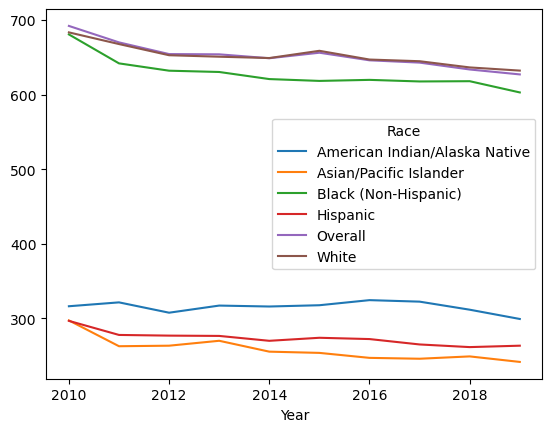

In [28]:
df_heart.groupby(["Year", "Race"])["Data_Value"].mean().unstack().plot()

### The Data_Value column in the dataset represents the age-adjusted death rate per 100,000 population for each county, age group, race/ethnicity, and sex

In [36]:
df_heart.to_csv('df_heart.csv')

In [30]:
df_heart

,Year,LocationAbbr,LocationDesc,GeographicLevel,Topic,Data_Value,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,AgeGroup,Race,Sex,LocationID
258405,2010,FL,Clay,County,All heart disease,NaN,Value suppressed,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall,12019
426804,2010,GA,Wheeler,County,All heart disease,NaN,Value suppressed,NaN,NaN,Ages 65 years and older,American Indian/Alaska Native,Overall,13309
314862,2010,GA,Brantley,County,All heart disease,1341.8,NaN,1187.0,1509.1,Ages 65 years and older,Overall,Overall,13025
158957,2010,CA,Los Angeles,County,All heart disease,1396.9,NaN,1359.9,1426.8,Ages 65 years and older,Overall,Men,6037
41461,2010,AL,Morgan,County,All heart disease,1666.9,NaN,1465.0,1952.3,Ages 65 years and older,Black (Non-Hispanic),Overall,1103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315362,2019,GA,Brooks,County,All heart disease,185.6,NaN,152.2,218.7,Ages 35-64 years,Overall,Men,13027
315312,2019,GA,Brooks,County,All heart disease,78.3,NaN,65.6,97.1,Ages 35-64 years,Overall,Women,13027
105156,2019,AR,Grant,County,All heart disease,136.6,NaN,116.3,161.8,Ages 35-64 years,White,Overall,5053
449457,2019,ID,Clark,County,All heart disease,NaN,Value suppressed,NaN,NaN,Ages 65 years and older,Black (Non-Hispanic),Overall,16033


In [12]:
SugarConsumption_df = pd.read_excel('../data/US_Sweetener Consumption.xlsx')
SugarConsumption_df.head(5)

,Year,sweetner_Per_capita_consumption_g_daily,RefinedCane_beetsugar_Per_capita_consumption_ g_daily,fructose_Per_capita_consumption_ g_daily
0,1970,13,75,0
1,1971,13,75,1
2,1972,14,75,1
3,1973,14,74,2
4,1974,14,70,2


In [13]:
SugarConsumption_df.columns

Index(['Year', 'sweetner_Per_capita_consumption_g_daily',
       'RefinedCane_beetsugar_Per_capita_consumption_ g_daily',
       'fructose_Per_capita_consumption_ g_daily'],
      dtype='object')

<Figure size 2000x1000 with 0 Axes>

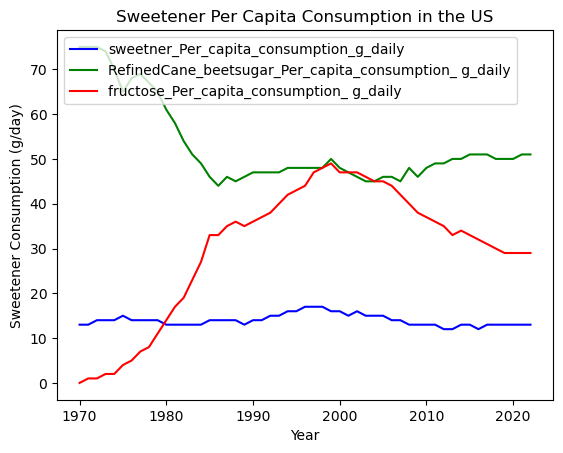

In [14]:
plt.figure(figsize=(20, 10))
lines = SugarConsumption_df.plot(x="Year", y=["sweetner_Per_capita_consumption_g_daily",'RefinedCane_beetsugar_Per_capita_consumption_ g_daily',
       'fructose_Per_capita_consumption_ g_daily'], style=["b-", "g-", "r-"]) 
plt.title("Sweetener Per Capita Consumption in the US")
plt.xlabel("Year")
plt.ylabel("Sweetener Consumption (g/day)")
plt.legend(loc="upper left")

In [15]:
sugar_merged_df = pd.merge(df,SugarConsumption_df,on="Year", how="inner")

In [16]:
sugar_merged_df

,Year,LocationAbbr,LocationDesc,GeographicLevel,Topic,Data_Value,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,AgeGroup,Race,Sex,LocationID,sweetner_Per_capita_consumption_g_daily,RefinedCane_beetsugar_Per_capita_consumption_ g_daily,fructose_Per_capita_consumption_ g_daily
0,2010,GA,Camden,County,Cardiovascular disease (CVD),1738.0,NaN,1515.5,1999.1,Ages 65 years and older,Overall,Women,13039,13,48,37
1,2010,FL,Clay,County,All heart disease,NaN,Value suppressed,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall,12019,13,48,37
2,2010,AZ,Pima,County,Cardiovascular disease (CVD),1302.0,NaN,1257.7,1351.8,Ages 65 years and older,Overall,Overall,4019,13,48,37
3,2010,AR,Grant,County,All stroke,NaN,Value suppressed,NaN,NaN,Ages 65 years and older,Asian/Pacific Islander,Overall,5053,13,48,37
4,2010,CO,Logan,County,Coronary heart disease (CHD),27.2,NaN,21.5,35.5,Ages 35-64 years,Hispanic,Overall,8075,13,48,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499316,2019,AL,Jackson,County,Cardiovascular disease (CVD),1996.0,NaN,1850.7,2145.6,Ages 65 years and older,Overall,Overall,1071,13,50,29
499317,2019,ID,Clark,County,Coronary heart disease (CHD),NaN,Value suppressed,NaN,NaN,Ages 65 years and older,Black (Non-Hispanic),Overall,16033,13,50,29
499318,2019,GA,Brooks,County,Cardiovascular disease (CVD),NaN,Value suppressed,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall,13027,13,50,29
499319,2019,GA,Brooks,County,Coronary heart disease (CHD),NaN,Value suppressed,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall,13027,13,50,29


In [20]:
sugar_merged_df.sort_values(by = 'Year', ascending=True )
sugar_merged_df

,Year,LocationAbbr,LocationDesc,GeographicLevel,Topic,Data_Value,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,AgeGroup,Race,Sex,LocationID,sweetner_Per_capita_consumption_g_daily,RefinedCane_beetsugar_Per_capita_consumption_ g_daily,fructose_Per_capita_consumption_ g_daily
0,2010,GA,Camden,County,Cardiovascular disease (CVD),1738.0,NaN,1515.5,1999.1,Ages 65 years and older,Overall,Women,13039,13,48,37
1,2010,FL,Clay,County,All heart disease,NaN,Value suppressed,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall,12019,13,48,37
2,2010,AZ,Pima,County,Cardiovascular disease (CVD),1302.0,NaN,1257.7,1351.8,Ages 65 years and older,Overall,Overall,4019,13,48,37
3,2010,AR,Grant,County,All stroke,NaN,Value suppressed,NaN,NaN,Ages 65 years and older,Asian/Pacific Islander,Overall,5053,13,48,37
4,2010,CO,Logan,County,Coronary heart disease (CHD),27.2,NaN,21.5,35.5,Ages 35-64 years,Hispanic,Overall,8075,13,48,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499316,2019,AL,Jackson,County,Cardiovascular disease (CVD),1996.0,NaN,1850.7,2145.6,Ages 65 years and older,Overall,Overall,1071,13,50,29
499317,2019,ID,Clark,County,Coronary heart disease (CHD),NaN,Value suppressed,NaN,NaN,Ages 65 years and older,Black (Non-Hispanic),Overall,16033,13,50,29
499318,2019,GA,Brooks,County,Cardiovascular disease (CVD),NaN,Value suppressed,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall,13027,13,50,29
499319,2019,GA,Brooks,County,Coronary heart disease (CHD),NaN,Value suppressed,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall,13027,13,50,29


In [37]:
sugar_merged_df.to_csv("sugar_merged_df.csv")

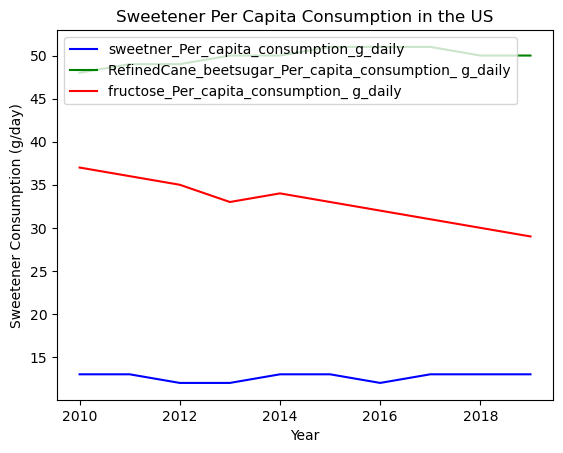

In [18]:
#plt.figure(figsize=(60, 50))
#sns.boxplot(x="Year", y=["sweetner_Per_capita_consumption_g_daily", "RefinedCane_beetsugar_Per_capita_consumption_ g_daily", "fructose_Per_capita_consumption_ g_daily"],data = sugar_merged_df)
lines = sugar_merged_df.plot(x="Year", y=["sweetner_Per_capita_consumption_g_daily", "RefinedCane_beetsugar_Per_capita_consumption_ g_daily", "fructose_Per_capita_consumption_ g_daily"], style=["b-", "g-", "r-"])
plt.title("Sweetener Per Capita Consumption in the US")
plt.xlabel("Year")
plt.ylabel("Sweetener Consumption (g/day)")
plt.legend(loc="upper left")

C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Year', ylabel='sweetner_Per_capita_consumption_g_daily'>

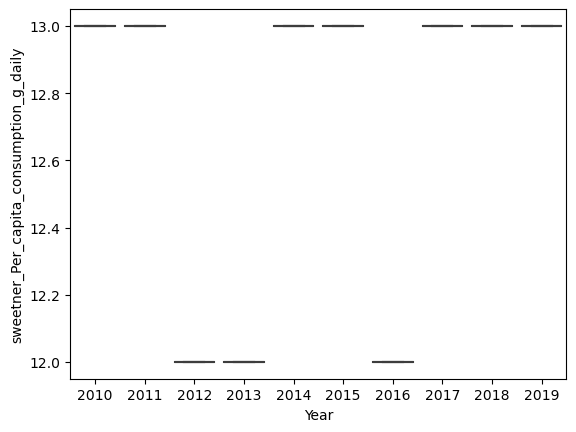

In [19]:
sns.boxplot(x='Year', y='sweetner_Per_capita_consumption_g_daily', data=sugar_merged_df)

C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


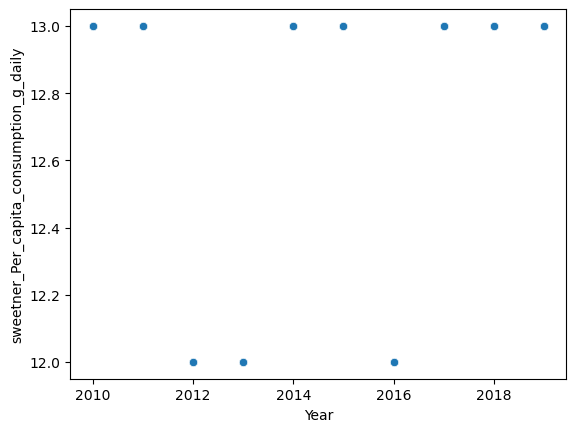

In [21]:
sns.scatterplot(x='Year', y='sweetner_Per_capita_consumption_g_daily', data=sugar_merged_df);
#sns.scatterplot.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


In [ ]:
sns.scatterplot(x='Year', y='RefinedCane_beetsugar_Per_capita_consumption_ g_daily', data=sugar_merged_df);

C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adisu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


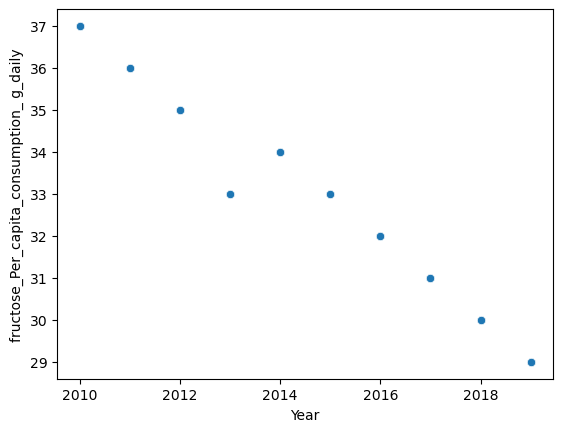

In [24]:
sns.scatterplot(x='Year', y='fructose_Per_capita_consumption_ g_daily', data=sugar_merged_df);

In [22]:
drinking_intensity = pd.read_excel('../data/Drinking_intensity.xlsx')

In [23]:
drinking_intensity

,Location,Median,75thPercentile
0,"Overall, unadjusted",5.4 (5.4–5.5),7.5 (7.4–7.6)
1,Alabama,5.5 (5.3–5.7),7.4 (6.7–7.9)
2,Alaska,5.5 (5.3–5.7),8.1 (7.3–9.4)
3,Arizona,5.4 (5.3–5.6),7.7 (7.3–8.5)
4,Arkansas,5.6 (5.3–5.8),7.8 (7.1–9.3)
5,California,5.4 (5.3–5.6),7.3 (7.0–7.7)
6,Colorado,5.5 (5.4–5.6),7.4 (7.1–7.6)
7,Connecticut,5.2 (5.0–5.4),6.5 (5.9–7.3)
8,Delaware,5.0 (4.8–5.2),6.3 (5.8–7.3)
9,District of Columbia,5.0 (4.8–5.2),6.3 (5.9–7.0)
